In [1]:
import numpy as np
import time
from scipy import linalg
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#あとで行列式の関数を作成
#教科書p49
matrix = np.array([[2,3,0],
                   [0,2,1],
                   [5,-4,-4]
                   ])
determinant = linalg.det(matrix)#行列式計算

def determinant(matrix):
    N = matrix.shape[0]
    #N次元の行列式を計算
    


In [3]:
#あとで連立方程式の関数を作成
#教科書p26
left_side = np.array([[0,2,-2],
                      [1,-2,3],
                      [3,-8,6]
                      ])

right_side = np.array([-4,2,0])

solver = np.linalg.solve(left_side, right_side)
print(solver)


[-4.  0.  2.]


In [4]:
#あとで固有値、固有ベクトルの関数を作成
matrix = np.array([[1,0,-1],
                   [1,2,1],
                   [2,2,3]
                   ])
w, v = np.linalg.eig(matrix)
print(w)
print(v)

[2. 3. 1.]
[[-6.66666667e-01 -4.08248290e-01  7.07106781e-01]
 [ 3.33333333e-01  4.08248290e-01 -7.07106781e-01]
 [ 6.66666667e-01  8.16496581e-01  1.75541673e-16]]


In [5]:

#1次から1000次の正方行列を生成してリスト化
matrix_list = []
right_side_list = []
for size in range(100,1001):
    matrix = np.random.randint(-10,10 , size = (size, size))
    matrix_list.append(matrix)
    right_side = np.random.randint(-10, 10, size = size)
    right_side_list.append(right_side)

#1次から1000次の連立方程式を生成してリスト
left_side_list = matrix_list


In [6]:
#計算回数
TIMES = 30

In [7]:

#複数回計算を回してその分散を見る
#計算時間はデスクトップだとTIMESが10のとき28s
#計算時間はデスクトップだと100から1000でTIMESが30のとき6mi
#ノートではやめとけ
determinant_time_df = pd.DataFrame()
for i in range(TIMES):
    #リストをforループで回し行列式の計算
    determinant_time_list = []#計算時間のリスト
    determinant_list = []
    for i, matrix in enumerate(matrix_list):
        start_time = time.time() 
        determinant = linalg.det(matrix)#行列式計算
        determinant_list.append(determinant)
        end_time = time.time()
        diff_time = end_time - start_time
        determinant_time_list.append(diff_time)
    determinant_time_df = pd.concat([determinant_time_df,pd.Series(determinant_time_list)], axis=1)

In [8]:


    

#計算時間はデスクトップだとTIMESが10のとき27s
#計算時間はデスクトップだと100から1000でTIMESが30のとき13mi
solver_time_df = pd.DataFrame()
for i in range(TIMES):
    #連立方程式の計算
    solver_time_list = []
    solver_list = []
    for left_side, right_side in zip(left_side_list, right_side_list):
        start_time = time.time() 
        solver = np.linalg.solve(left_side, right_side)
        solver_list.append(solver)
        end_time = time.time() 
        diff_time = end_time - start_time
        solver_time_list.append(diff_time)
    solver_time_df = pd.concat([solver_time_df,pd.Series(solver_time_list)], axis=1)

    

In [9]:

#計算時間はデスクトップだとTIMESが10のとき8minit

#計算時間はデスクトップだと100から1000でTIMESが30のとき160mi
eig_time_df = pd.DataFrame()
for i in range(TIMES):
    #連立方程式の計算
    eig_time_list = []
    eig_list = []
    for matrix in matrix_list:
        start_time = time.time() 
        eig = np.linalg.eig(matrix)
        eig_list.append(eig)
        end_time = time.time() 
        diff_time = end_time - start_time
        eig_time_list.append(diff_time)
    eig_time_df = pd.concat([eig_time_df,pd.Series(eig_time_list)], axis=1)

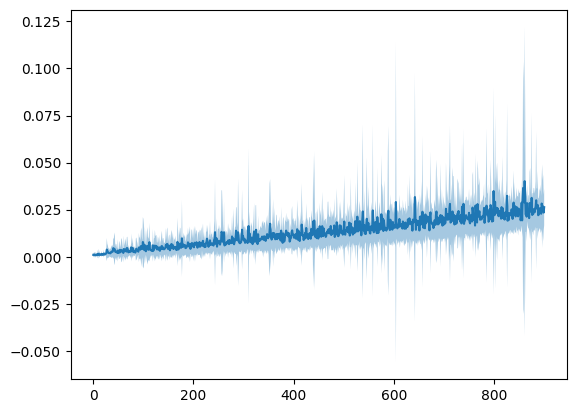

In [10]:
index = determinant_time_df.index.values
mean = determinant_time_df.mean(axis=1).values
std = determinant_time_df.std(axis=1).values
index = np.array(index, dtype=float)
mean = np.array(mean, dtype=float)
std = np.array(std, dtype=float)

#標準偏差込みの折れ線グラフ
ax = plt.subplot(111)

ax.plot(index, mean)
ax.fill_between(index, mean + std, mean - std, alpha=0.4)



In [11]:
solver_time_df

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.014979,0.001003,0.000000,0.001993,0.002021,0.000000,0.001004,0.001020,0.001028,0.001004,...,0.001003,0.001008,0.000000,0.001006,0.001011,0.001004,0.000000,0.001005,0.000000,0.001010
1,0.007127,0.001054,0.001052,0.009475,0.001205,0.001412,0.001136,0.001011,0.001025,0.001023,...,0.001012,0.001002,0.001008,0.001041,0.001002,0.001171,0.001335,0.001057,0.001504,0.000000
2,0.001994,0.000000,0.001045,0.007974,0.001451,0.001056,0.001036,0.000000,0.000000,0.001015,...,0.001090,0.000000,0.001052,0.001010,0.001004,0.000000,0.001003,0.000000,0.001070,0.001507
3,0.001991,0.001051,0.001032,0.001215,0.001004,0.000000,0.000000,0.001049,0.001048,0.000000,...,0.000000,0.001003,0.001029,0.000000,0.000000,0.001061,0.000000,0.001062,0.000000,0.001011
4,0.006298,0.001186,0.000000,0.001005,0.001035,0.001449,0.001302,0.001047,0.001267,0.001003,...,0.001250,0.001122,0.000000,0.001340,0.001440,0.001055,0.001019,0.000998,0.001051,0.001147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,0.022956,0.021032,0.271652,0.352190,0.362352,0.070507,0.032963,0.031586,0.028475,0.027883,...,0.045233,0.031670,0.033052,0.017072,0.019701,0.017236,0.018242,0.028098,0.032952,0.019604
897,0.035106,0.015774,0.371360,0.419781,0.583235,0.178620,0.018177,0.029409,0.034389,0.020774,...,0.031916,0.043528,0.016062,0.023874,0.032904,0.035802,0.021249,0.023096,0.014845,0.022519
898,0.031927,0.029171,0.314487,0.357466,0.356293,0.024045,0.024215,0.017844,0.032868,0.039525,...,0.018194,0.027040,0.033149,0.019136,0.031804,0.032692,0.034352,0.017311,0.015178,0.044532
899,0.030530,0.028865,0.264666,0.235858,0.268146,0.030628,0.045837,0.018951,0.030223,0.037360,...,0.018598,0.031604,0.023116,0.023384,0.017660,0.032068,0.036308,0.040236,0.024605,0.030980


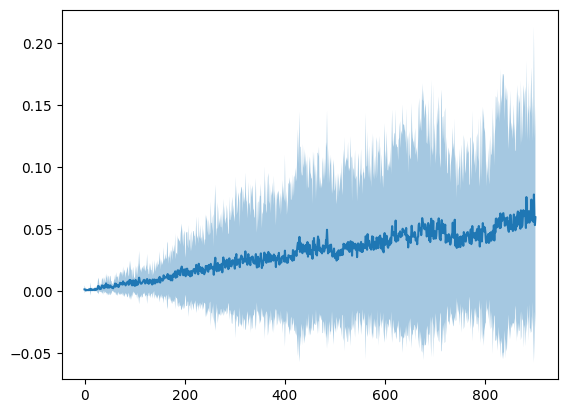

In [12]:
index = solver_time_df.index.values
mean = solver_time_df.mean(axis=1).values
std = solver_time_df.std(axis=1).values
index = np.array(index, dtype=float)
mean = np.array(mean, dtype=float)
std = np.array(std, dtype=float)

#標準偏差込みの折れ線グラフ
ax = plt.subplot(111)

ax.plot(index, mean)
ax.fill_between(index, mean + std, mean - std, alpha=0.4)


In [13]:
eig_time_df

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.010637,0.007974,0.008974,0.009967,0.006973,0.007974,0.008970,0.008978,0.008980,0.008970,...,0.007985,0.008974,0.008971,0.007973,0.007978,0.007978,0.009477,0.007977,0.007977,0.007977
1,0.006494,0.007973,0.007968,0.006976,0.007977,0.007973,0.006976,0.006977,0.006976,0.006976,...,0.007972,0.008966,0.006976,0.007973,0.007972,0.006974,0.006978,0.007974,0.007976,0.006976
2,0.008253,0.008970,0.007974,0.009963,0.006978,0.007974,0.007974,0.007974,0.009485,0.008971,...,0.007492,0.006981,0.007973,0.006976,0.006980,0.007483,0.010958,0.007973,0.006980,0.006973
3,0.007232,0.008971,0.007974,0.007976,0.008969,0.008968,0.009963,0.008966,0.007978,0.007972,...,0.007982,0.008965,0.008971,0.008970,0.008483,0.007977,0.007973,0.008969,0.008494,0.008572
4,0.008316,0.008969,0.007983,0.009968,0.008970,0.009969,0.008970,0.008974,0.008970,0.008966,...,0.008969,0.009971,0.008969,0.008970,0.008969,0.008966,0.008970,0.008976,0.009000,0.008966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,0.807074,0.873196,0.877628,0.861755,0.854322,0.879658,0.858801,0.804087,0.872095,0.859818,...,0.890635,0.869898,0.872324,0.875749,0.859020,0.876566,0.867187,0.851132,0.865968,0.889412
897,0.831430,0.910515,0.908082,0.891041,0.891995,0.902274,0.891238,0.923829,0.922071,0.898172,...,0.891491,0.909696,0.885921,0.888910,0.880974,0.913988,0.905638,0.905325,0.900682,0.913301
898,0.856634,0.884431,0.850080,0.874988,0.863497,0.890899,0.870043,0.877600,0.890507,0.889718,...,0.854103,0.883475,0.877857,0.860451,0.850406,0.858330,0.857481,0.855492,0.858672,0.893206
899,0.879459,0.905295,0.881920,0.881688,0.895322,0.910337,0.900200,0.871223,0.900402,0.884017,...,0.903722,0.913570,0.889191,0.896610,0.888813,0.905350,0.894343,0.890776,0.931449,0.923544


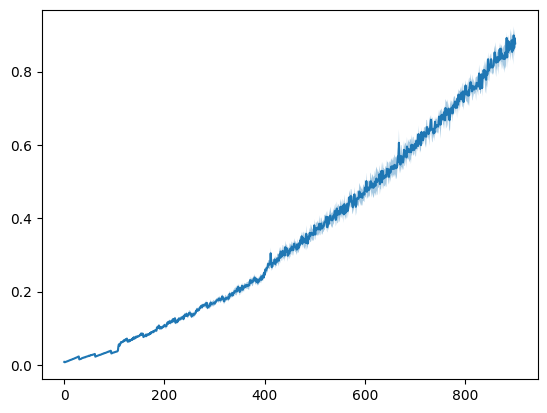

In [14]:
index = eig_time_df.index.values
mean = eig_time_df.mean(axis=1).values
std = eig_time_df.std(axis=1).values

index = np.array(index, dtype=float)
mean = np.array(mean, dtype=float)
std = np.array(std, dtype=float)
#標準偏差込みの折れ線グラフ
ax = plt.subplot(111)

ax.plot(index, mean)
ax.fill_between(index, mean + std, mean - std, alpha=0.4)


In [18]:
import datetime
savetime = time.time()

t_delta = datetime.timedelta(hours=9)
JST = datetime.timezone(t_delta, 'JST')
now = datetime.datetime.now(JST)

d = now.date().strftime('%Y%m%d')

determinant_time_df.to_csv("data/" + d + "_det.csv")
solver_time_df.to_csv("data/" + d + "_sol.csv")
eig_time_df.to_csv("data/" + d + "_eig.csv")

In [19]:
print("終了")

終了
